# Comparing theoretical prediction with experiments

Hypothesis: $N_c$ (the critical number of particles) is given by the relation:

$$N_c = 8\pi Tr^2/(\delta L),$$

where $T$ represents the gate threshold, $r$ represents the radius of the reservoir, $\delta$ represents the width of the channel and $L$ represents the length of the channel.

We want to use our simulation to test the accuracy of this relation, and its stability with respect to the individual parameters.

We will test this relationship and its interdependence as follows:

1. Confirm that this critical mass $N_c$ is indeed corresponding to a fixed density, i.e. that $N_c \sim r^2$.
2. Fix $\rho_c = N_c/r^2$ (so that we don't have to make $N_c$ too large and future simulations too long) and see if it is linear with respect to $T$ and inversely proportional to $\delta$ and $L$.
3. Experimentally determine constant $C$ of the relation  
$$\rho_c = \rho_c(T,\delta,L) = C*T/ (\delta L)$$

(provided that 2. holds) and see if this value of $C$ corresponds to $8\pi$ or how far off it is.

## Relation between $N_c$ and $r$
We fix the following parameters: $T = 2$, $L=0.6$, $\delta = 0.3$, while we vary $r$ and $N_C$.

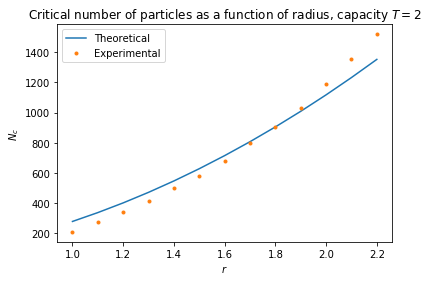

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
crit = np.array([210,273,343,413,500,577,679,796,906,1031,1187,1352,1518])
radii = np.linspace(1.,2.2,len(crit))
delta = 0.3
L = 0.6
n_c = 8*np.pi*2*radii**2/(L*delta)
T = 2
plt.figure()
plt.plot(radii,n_c)
plt.plot(radii,crit,'.')
plt.title("Critical number of particles as a function of radius, capacity $T = 2$")
plt.xlabel("$r$")
plt.ylabel("$N_c$")
plt.legend(["Theoretical","Experimental"])
plt.show()

We see quite a good quantitative agreement, although it seems the experimental values grow faster than the theoretical one.

 - *Is there a quadratic relation between the radius and the critical number of particles?*

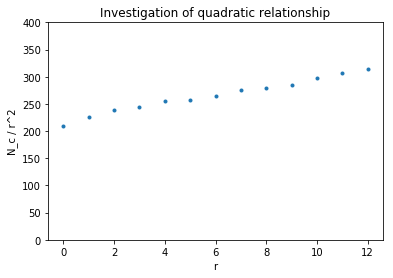

In [2]:
plt.plot(crit/(radii)**2,'.')
plt.title("Investigation of quadratic relationship")
plt.xlabel("r")
plt.ylabel("N_c / r^2")
plt.ylim([0,400])
plt.show()

Apparently, there is not. The critical number of particles seem to grow superquadratically in the radius of the reservoir.

How does this relation behave for a large number of particles, say $T=20$?
In order to keep the computation viable, we reduce the radius to values smaller than one

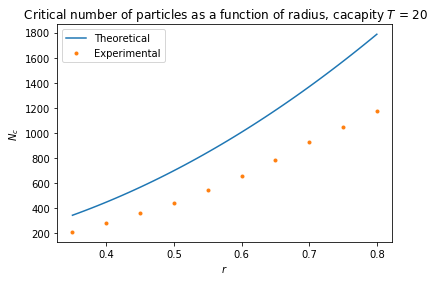

In [3]:
filename ='cmake-build-release/high_cap_density_test.txt'
radii = []
n_c = []
with open(filename,'r') as f:
    for line in f.readlines():
        if 'number of steps' in line:
            param_line = line
            continue
        radii.append(float(line.split()[1]))
        n_c.append(int(line.split()[3]))
radii = np.array(radii)
n_c = np.array(n_c)
radii_cont = np.linspace(np.min(radii),np.max(radii))
T = 20
n_c_cont = 8*np.pi*T*radii_cont**2/(L*delta)
plt.plot(radii_cont,n_c_cont)
plt.plot(radii,n_c,'.')
plt.title(" Critical number of particles as a function of radius, cacapity $T$ = 20")
plt.xlabel("$r$")
plt.ylabel("$N_c$")
plt.legend(['Theoretical','Experimental'])
plt.show()

In this case, the quantitative agreement is less. The theoretical prediction seems to be off by a factor 2.

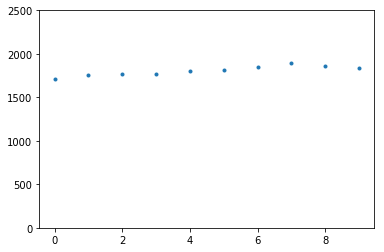

In [4]:
plt.plot(n_c/radii**2,'.')
plt.ylim([0,2500])
plt.show()

However, the quadratic relationship here is maintained better, as we can see in the plot below; we only see a slight superquadraticness.
For this reason, we will stick to the asssumption that we can refer to the critical number of particles as a critical density.
This will aid us in performing the next experiment, since increasing gate capacity and keeping reservoir volume fixed makes simulations both longer and more computationally expensive.
What about the other parameters?

## Relation between $\rho_c \approx N_c/r^2$ and $T$

What happens if we fix all other parameters, keep $\rho_c$ constant and increase $T$? Do we observe the expected linear relationship?

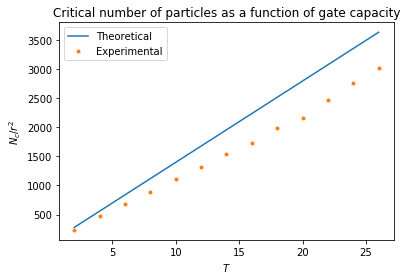

In [5]:
filename ='cmake-build-release/capacity_test.txt'
capacity = []
n_c = []
with open(filename,'r') as f:
    for line in f.readlines():
        if 'number of steps' in line:
            param_line = line
            continue
        capacity.append(int(line.split()[1]))
        n_c.append(int(line.split()[3]))
capacity = np.array(capacity)
T_cont = np.linspace(capacity.min(),capacity.max())
dens = 8*np.pi*T_cont/(delta*L)
n_c = np.array(n_c)
radii = 1 - np.cumsum(np.ones(len(n_c)))*0.05 - 0.05
plt.plot(T_cont,dens)
plt.plot(capacity,n_c/radii**2,'.')
plt.xlabel("$T$")
plt.ylabel("$N_c/r^2$")
plt.title("Critical number of particles as a function of gate capacity")
plt.legend(['Theoretical','Experimental'])
plt.show()

That looks very linear. It seems that this relationship is satisfied.

## Relation between $N_c$ and $\delta$

What about the relation between the critical number of particles and the channel height?
(note that in this experiment, we can keep $r$ fixed without running into scaling issues, so that's what we do)

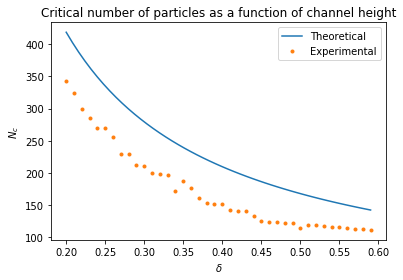

In [6]:
filename ='cmake-build-release/height_test.txt'
height = []
n_c = []
with open(filename,'r') as f:
    for line in f.readlines():
        if 'number of steps' in line:
            param_line = line
            continue
        height.append(float(line.split()[1]))
        n_c.append(int(line.split()[3]))
height = np.array(height)
delta_cont = np.linspace(height.min(),height.max())
n_c_cont = 8*np.pi*2/(delta_cont*L)
n_c = np.array(n_c)
plt.plot(delta_cont,n_c_cont)
plt.plot(height,n_c,'.')
plt.title("Critical number of particles as a function of channel height")
plt.xlabel("$\delta$")
plt.ylabel("$N_c$")
plt.legend(['Theoretical','Experimental'])
plt.show()

That looks like an inverse relationship, following the same behaviour as the theoretical estimates, albeit quite different in value.
What happens if we check the quantity $N_c\delta$?

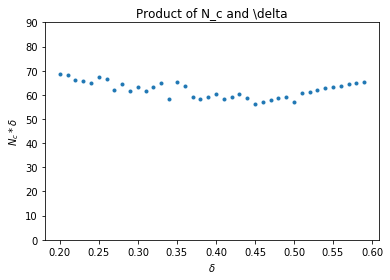

In [7]:
plt.plot(height,height*n_c,'.')
plt.title("Product of N_c and \delta")
plt.xlabel("$\delta$")
plt.ylabel("$N_c*\delta$")
plt.ylim([0,90])
plt.show()

That seems to be roughly constant. The rise at the end might be due to second order effects due to geometrical changes in the channel.

## Relation between $N_c$ and $L$

Finally, let's check if the same inverse relationship holds for the length of the channel $L$.

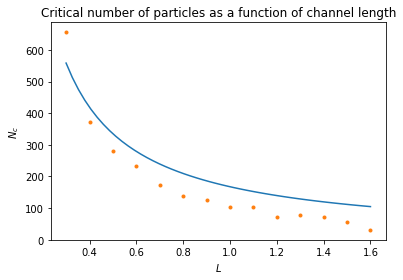

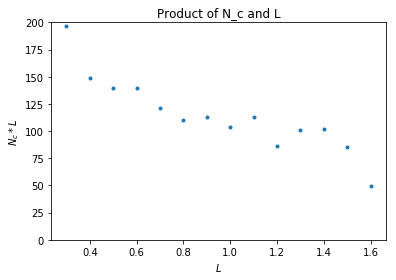

In [8]:
filename ='cmake-build-release/length_test.txt'
length = []
n_c = []
with open(filename,'r') as f:
    for line in f.readlines():
        if 'number of steps' in line:
            param_line = line
            continue
        length.append(float(line.split()[1]))
        n_c.append(int(line.split()[3]))
length = np.array(length)
n_c = np.array(n_c)
L_cont = np.linspace(length.min(),length.max())
n_c_cont = 8*np.pi*2/(delta*L_cont)
n_c = np.array(n_c)
plt.plot(L_cont,n_c_cont)
plt.plot(length,n_c,'.')
plt.title("Critical number of particles as a function of channel length")
plt.xlabel("$L$")
plt.ylabel("$N_c$")
plt.show()

plt.plot(length,length*n_c,'.')
plt.xlabel("$L$")
plt.title("Product of N_c and L")

plt.ylabel("$N_c*L$")
plt.ylim([0,200])
plt.show()

Here, we seem to have less of an inverse relationship, but a closer agreement to the theoretical estimates.

These observations lead me to think that trying to find a better proportionality constant than $8\pi$.
However, the theoretical relation between the different parameters is not far off, and I would even postulate that there is a pararameter regime in which it could be a very decent approximation.
Maybe there are some second order effects which we haven't included?